In [1]:
import scanpy as sc
from sklearn.model_selection import StratifiedKFold
import numpy as np

import sys
sys.path.append('../')
import scNear

c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read data

In [2]:
adata = sc.read("data/MacParland.h5ad", cache=True)

### Split data for training and testing

# Initialize Stratified K-Fold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through the folds
adata_train = adata.copy()
adata_test = adata.copy()
for train_index, test_index in stratified_kfold.split(adata.X, adata.obs["cell_type"]):
    adata_train = adata_train[train_index, :].copy()
    adata_test = adata_test[test_index, :].copy()
    break

c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
print(f"Train data contains {adata_train.X.shape[0]} cells and {adata_train.X.shape[1]} genes")
print(f"Test data contains {adata_test.X.shape[0]} cells and {adata_test.X.shape[1]} genes")

Train data contains 6755 cells and 15386 genes
Test data contains 1689 cells and 15386 genes


## Train model

In [4]:
scNear.train(adata=adata_train, target_key="cell_type", batch_key="patientID")

c:\Users\user\Documents\GitHub\MT_test_repo\Tutorial\..\scNear\functions\train.py:759: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  unique_train_labels = np.unique(self.adata.obs[self.target_key][train_index])
c:\Users\user\Documents\GitHub\MT_test_repo\Tutorial\..\scNear\functions\train.py:760: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  filtered_val_index = [idx for idx in val_index if self.adata.obs[self.target_key][idx] in unique_train_labels]
c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:258: FutureWarning: The default of observed=False is dep

Number of parameters: 2558600

Start Training



  2%|▏         | 1/50 [00:24<19:57, 24.43s/it]

Epoch 1 | Training loss: 2.7650 | Validation loss: 1.9399


  4%|▍         | 2/50 [00:47<18:53, 23.61s/it]

Epoch 2 | Training loss: 1.8475 | Validation loss: 1.0176


  6%|▌         | 3/50 [01:09<17:53, 22.83s/it]

Epoch 3 | Training loss: 1.2521 | Validation loss: 0.8206


  8%|▊         | 4/50 [01:35<18:23, 24.00s/it]

Epoch 4 | Training loss: 0.9636 | Validation loss: 0.6571


 10%|█         | 5/50 [01:59<17:58, 23.96s/it]

Epoch 5 | Training loss: 0.7208 | Validation loss: 0.5286


 12%|█▏        | 6/50 [02:22<17:33, 23.94s/it]

Epoch 6 | Training loss: 0.5247 | Validation loss: 0.4408


 14%|█▍        | 7/50 [02:45<16:45, 23.39s/it]

Epoch 7 | Training loss: 0.3400 | Validation loss: 0.3587


 16%|█▌        | 8/50 [03:05<15:38, 22.34s/it]

Epoch 8 | Training loss: 0.2483 | Validation loss: 0.3345


 18%|█▊        | 9/50 [03:25<14:49, 21.69s/it]

Epoch 9 | Training loss: 0.2242 | Validation loss: 0.3054


 20%|██        | 10/50 [03:46<14:12, 21.31s/it]

Epoch 10 | Training loss: 0.1961 | Validation loss: 0.2857


 22%|██▏       | 11/50 [04:06<13:38, 20.98s/it]

Epoch 11 | Training loss: 0.1836 | Validation loss: 0.2826


 24%|██▍       | 12/50 [04:26<13:10, 20.81s/it]

Epoch 12 | Training loss: 0.1752 | Validation loss: 0.2722


 26%|██▌       | 13/50 [04:46<12:37, 20.48s/it]

Epoch 13 | Training loss: 0.1672 | Validation loss: 0.2778


 28%|██▊       | 14/50 [05:06<12:11, 20.33s/it]

Epoch 14 | Training loss: 0.1719 | Validation loss: 0.2762


 30%|███       | 15/50 [05:26<11:51, 20.33s/it]

Epoch 15 | Training loss: 0.1555 | Validation loss: 0.2723


 32%|███▏      | 16/50 [05:47<11:36, 20.47s/it]

Epoch 16 | Training loss: 0.1616 | Validation loss: 0.2662


 34%|███▍      | 17/50 [06:07<11:11, 20.35s/it]

Epoch 17 | Training loss: 0.1574 | Validation loss: 0.2677


 36%|███▌      | 18/50 [06:27<10:47, 20.24s/it]

Epoch 18 | Training loss: 0.1507 | Validation loss: 0.2628


 38%|███▊      | 19/50 [06:47<10:26, 20.21s/it]

Epoch 19 | Training loss: 0.1556 | Validation loss: 0.2666


 40%|████      | 20/50 [07:07<10:05, 20.18s/it]

Epoch 20 | Training loss: 0.1523 | Validation loss: 0.2646


 42%|████▏     | 21/50 [07:28<09:47, 20.26s/it]

Epoch 21 | Training loss: 0.1577 | Validation loss: 0.2671


 44%|████▍     | 22/50 [07:48<09:27, 20.27s/it]

Epoch 22 | Training loss: 0.1530 | Validation loss: 0.2726


 46%|████▌     | 23/50 [08:08<09:06, 20.24s/it]

Epoch 23 | Training loss: 0.1467 | Validation loss: 0.2701


 48%|████▊     | 24/50 [08:29<08:48, 20.32s/it]

Epoch 24 | Training loss: 0.1450 | Validation loss: 0.2729


 50%|█████     | 25/50 [08:49<08:26, 20.27s/it]

Epoch 25 | Training loss: 0.1427 | Validation loss: 0.2774


 52%|█████▏    | 26/50 [09:09<08:06, 20.28s/it]

Epoch 26 | Training loss: 0.1451 | Validation loss: 0.2799


 54%|█████▍    | 27/50 [09:30<07:47, 20.31s/it]

Epoch 27 | Training loss: 0.1508 | Validation loss: 0.2764


 56%|█████▌    | 28/50 [09:50<07:27, 20.35s/it]

Epoch 28 | Training loss: 0.1458 | Validation loss: 0.2742


 58%|█████▊    | 29/50 [10:10<07:05, 20.25s/it]

Epoch 29 | Training loss: 0.1488 | Validation loss: 0.2796


 60%|██████    | 30/50 [10:30<06:44, 20.21s/it]

Epoch 30 | Training loss: 0.1462 | Validation loss: 0.2767


 62%|██████▏   | 31/50 [10:51<06:25, 20.28s/it]

Epoch 31 | Training loss: 0.1364 | Validation loss: 0.2746


 64%|██████▍   | 32/50 [11:11<06:04, 20.27s/it]

Epoch 32 | Training loss: 0.1468 | Validation loss: 0.2740


 66%|██████▌   | 33/50 [11:31<05:43, 20.21s/it]

Epoch 33 | Training loss: 0.1579 | Validation loss: 0.2764


 68%|██████▊   | 34/50 [11:51<05:22, 20.16s/it]

Epoch 34 | Training loss: 0.1417 | Validation loss: 0.2786


 70%|███████   | 35/50 [12:11<05:03, 20.26s/it]

Epoch 35 | Training loss: 0.1466 | Validation loss: 0.2779


 72%|███████▏  | 36/50 [12:31<04:42, 20.17s/it]

Epoch 36 | Training loss: 0.1506 | Validation loss: 0.2804


 74%|███████▍  | 37/50 [12:52<04:22, 20.19s/it]

Epoch 37 | Training loss: 0.1398 | Validation loss: 0.2797


 74%|███████▍  | 37/50 [13:12<04:38, 21.42s/it]

Epoch 38 | Training loss: 0.1409 | Validation loss: 0.2757
Stopped training using EarlyStopping at epoch 38

**Finished training**

Best validation loss (reached after 18 epochs): 0.2628061592578888

Training time: 13.21 minutes
Total training time: 13.25 minutes



## Predict on test data

In [3]:
predictions = scNear.predict(adata=adata_test)

## Visualize test data embedding space

c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\user\Documents\GitHub\MT_test_repo\env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


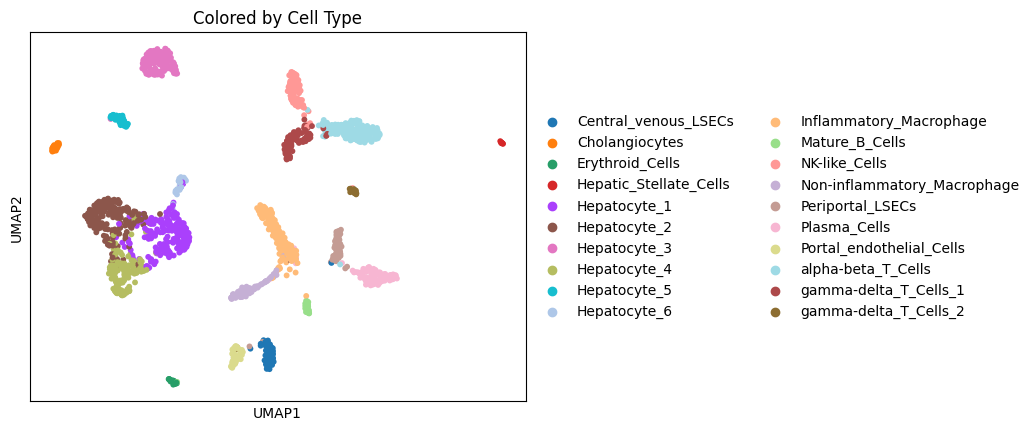

In [5]:
adata_test.obsm["latent_space"] = predictions

sc.pp.neighbors(adata_test, use_rep="latent_space")

sc.tl.umap(adata_test)
sc.pl.umap(adata_test, color="cell_type", ncols=1, title="Colored by Cell Type")

## Make cell type vector representations

Calculates the centorids of each clel type cluster in latent space and return it as the cell type representation

In [4]:
representations = scNear.generate_representations(adata=adata_test, target_key="cell_type")

In [5]:
representations

,Central_venous_LSECs,Cholangiocytes,Erythroid_Cells,Hepatic_Stellate_Cells,Hepatocyte_1,Hepatocyte_2,Hepatocyte_3,Hepatocyte_4,Hepatocyte_5,Hepatocyte_6,Inflammatory_Macrophage,Mature_B_Cells,NK-like_Cells,Non-inflammatory_Macrophage,Periportal_LSECs,Plasma_Cells,Portal_endothelial_Cells,alpha-beta_T_Cells,gamma-delta_T_Cells_1,gamma-delta_T_Cells_2
0,0.632675,0.043816,0.466975,0.328986,0.612081,-0.435518,-1.835094,0.264658,0.110933,-0.057691,-0.392007,-0.600405,0.051045,0.426869,-0.006911,0.156528,0.016487,-0.279058,-0.143779,0.050886
1,-0.052743,-1.013166,-0.832720,-0.042100,0.226464,-0.164539,-1.796637,0.476457,-0.675567,-0.867951,-0.095324,-0.110705,0.417568,-0.115408,0.268057,0.163078,0.145639,0.374039,0.335196,0.576546
2,0.557310,-0.407316,0.220350,0.239456,0.224373,-0.799011,-3.322857,0.788823,0.096371,-1.452354,0.290538,1.223126,-0.414295,0.435429,0.099039,0.428911,-0.209754,-0.461335,-0.089674,-0.103432
3,0.671000,-0.009630,2.158173,0.394021,-0.497988,0.196073,-0.207751,-0.886789,-0.948854,0.042823,-0.193475,-0.163298,0.002079,-0.225437,0.735038,0.122920,0.929838,-0.408415,-0.708486,0.144403
4,-0.366920,-0.324782,2.456366,0.353939,-0.808370,-0.179964,1.154113,-1.001238,-0.250431,0.029832,0.983639,0.218325,-0.070097,0.527983,0.327824,0.212028,-0.206102,-0.232219,0.023640,-0.670558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.743098,0.633824,1.608388,0.101170,-0.818063,0.278050,2.103885,-1.251380,-1.530490,1.570575,0.091238,0.266419,-0.426438,-0.031082,-0.091687,-0.674913,0.472316,-0.155644,-0.494306,-0.121949
96,-0.558224,-0.324512,-1.346370,-0.065680,0.430184,1.302194,-0.107315,0.734564,-1.706693,0.220648,0.176590,0.371087,0.155759,-0.138741,-0.327343,-0.782606,-0.248467,-0.050186,0.716548,0.145736
97,-0.063311,-0.148187,-1.911215,0.232459,0.176071,0.941660,0.709000,-0.209431,-1.658348,0.219786,-0.190531,-0.464296,0.624947,0.230690,-0.170631,-0.014431,0.498927,0.247940,0.010982,-0.451274
98,-0.527333,0.026034,-2.060536,-0.070586,0.303120,-0.849749,-0.131198,-0.037556,0.910571,-0.162663,0.670077,0.114640,-0.279024,0.966085,0.383088,0.023244,-0.493092,-0.173568,0.680221,-0.149986
